In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron as SklearnPerceptron


In [2]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Convert labels from (0,1) to (-1, 1) for Perceptron
y = np.where(y == 0, -1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 455, Test samples: 114


In [ ]:
# Define a Perceptron class to implement the learning algorithm
class Perceptron:
    # Initialize Perceptron
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Train Perceptron
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # Training loop
        for _ in range(self.n_iters):
            # Shuffle data each epoch
            shuffled_indices = np.random.permutation(n_samples)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            updates_made = False

            # Update weights
            for idx in range(n_samples):
                x_i = X_shuffled[idx]
                y_i = y_shuffled[idx]
                margin = y_i * (np.dot(x_i, self.weights) + self.bias)

                if margin <= 0:  # Update condition based on margin
                    self.weights += self.lr * y_i * x_i
                    self.bias += self.lr * y_i
                    updates_made = True

            if not updates_made:  # Early stopping
                break

    # Make predictions
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)  # Clearer prediction rule

In [4]:
# Import necessary libraries for data handling and visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)


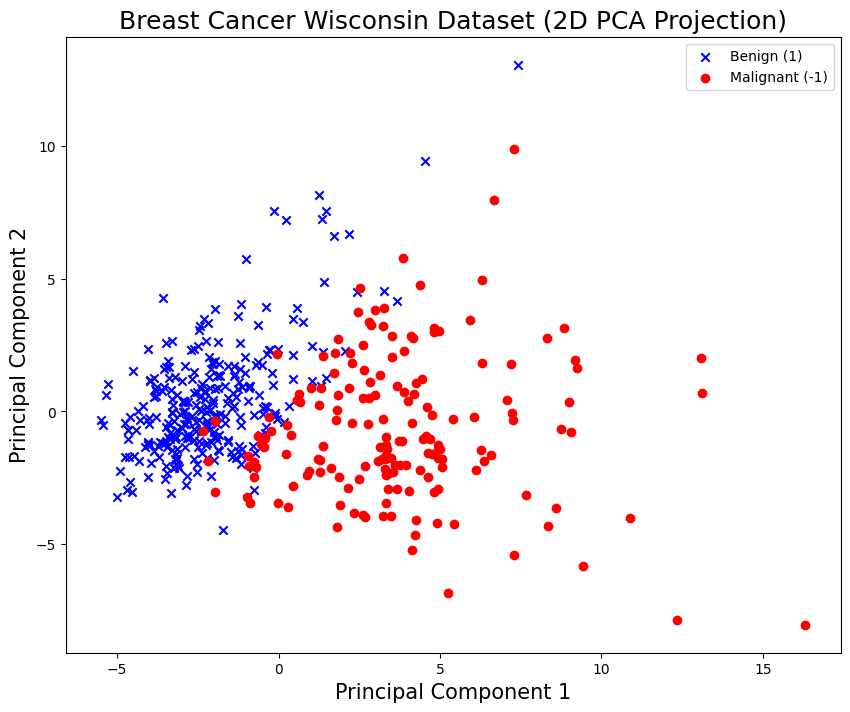

In [5]:
# Visualize the dataset (projected to 2D for visualization only)
plt.figure(figsize=(10, 8))
plt.scatter(X_train_2D[y_train == 1, 0], X_train_2D[y_train == 1, 1], color='blue', marker='x', label='Benign (1)')
plt.scatter(X_train_2D[y_train == -1, 0], X_train_2D[y_train == -1, 1], color='red', marker='o', label='Malignant (-1)')
plt.title("Breast Cancer Wisconsin Dataset (2D PCA Projection)", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries for data handling and visualization
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision regions
def plot_decision_regions(X, y, clf, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdBu
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # Plot the training points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)


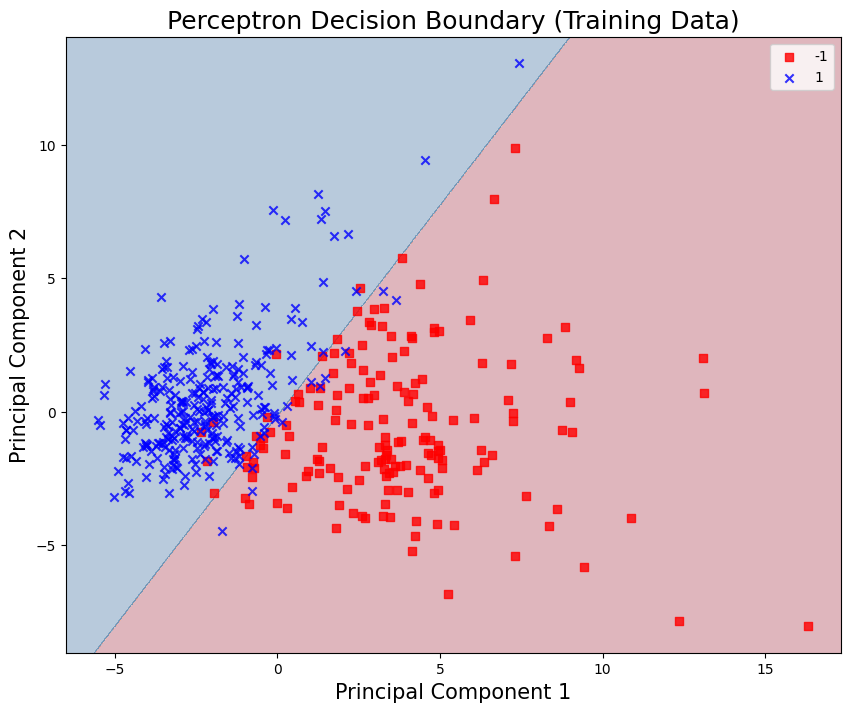

In [ ]:
# Retrain perceptron on 2D data
perceptron_2D = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_2D.fit(X_train_2D, y_train)

# Visualize decision boundary learned by the Perceptron
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_2D, y_train, clf=perceptron_2D)
plt.title("Perceptron Decision Boundary (Training Data)", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.legend(loc='upper right')
plt.show()


In [8]:
# Train on full dataset and evaluate
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 93.86%


In [ ]:
# Initialize and train sklearn's Perceptron
sklearn_perceptron = SklearnPerceptron(max_iter=1000, eta0=0.01, tol=1e-3, random_state=42)
sklearn_perceptron.fit(X_train, y_train)

# Evaluate on test set
sklearn_accuracy = sklearn_perceptron.score(X_test, y_test)
print(f"Sklearn Perceptron Test Accuracy: {sklearn_accuracy * 100:.2f}%")


Sklearn Perceptron Test Accuracy: 98.25%
